# In Class Lab 4


In [80]:
#In Class Lab 4 Template
# G Besla ASTR 400B

# Load Modules
import numpy as np
import astropy.units as u

# import plotting modules and set preferences (Computer Modern, please!)
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import rc
%matplotlib inline
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']}) # Computer Modern with TeX
rc('text', usetex=True)

# Change color cycle to something that feels better
cmap = plt.get_cmap('jet')
color_index = np.linspace(0.1, 0.9, 14) # 14 isochrones
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=[cmap(k) for k in color_index]) 

The Figure illustrates the color magnitude diagram (CMD) for the Carina Dwarf along with the interpreted 
star formation history from isochrone fitting to the CMD.
The image is from Tolstoy+2009 ARA&A 47 review paper about dwarf galaxies

![Iso](./Lab4_Isochrones.png)


# This Lab:

Modify the template file of your choice to plot isochrones that correspond to the inferred star formation episodes (right panel of Figure 1) to recreate the dominant features of the CMD of Carina (left panel of Figure 1). 

In [81]:
# Some Notes about the Isochrone Data
# DATA From   http://stellar.dartmouth.edu/models/isolf_new.html
# files have been modified from download.  ( M/Mo --> M;   Log L/Lo --> L)
# removed #'s from all lines except column heading
# NOTE SETTINGS USED:  Y = 0.245 default   [Fe/H] = -2.0  alpha/Fe = -0.2
# These could all be changed and it would generate a different isochrone

**Keeping track of files:**

In [82]:
# Filename for data with Isochrone fit for 1 Gyr
# These files are located in the folder IsochroneData
filename1 = "./IsochroneData/Isochrone1.txt"
filename2 = "./IsochroneData/Isochrone2.txt"
filename3 = "./IsochroneData/Isochrone3.txt"
filename4 = "./IsochroneData/Isochrone4.txt"
filename5 = "./IsochroneData/Isochrone5.txt"
filename6 = "./IsochroneData/Isochrone6.txt"
filename7 = "./IsochroneData/Isochrone7.txt"
filename8 = "./IsochroneData/Isochrone8.txt"
filename9 = "./IsochroneData/Isochrone9.txt"
filename10 = "./IsochroneData/Isochrone10.txt"
filename11 = "./IsochroneData/Isochrone11.txt"
filename12 = "./IsochroneData/Isochrone12.txt"
filename13 = "./IsochroneData/Isochrone13.txt"
filename14 = "./IsochroneData/Isochrone13_5.txt"

# Keep them all in a list for easy access
files = [filename1, filename2, filename3, filename4, filename5, filename6, filename7,
        filename8, filename9, filename10, filename11, filename12, filename13, filename14]

# Labels
times = ['1 Gyr', '2 Gyr', '3 Gyr', '4 Gyr', '5 Gyr', '6 Gyr', '7 Gyr', '8 Gyr', '9 Gyr',
        '10 Gyr', '11 Gyr', '12 Gyr', '13 Gyr', '13.5 Gyr']

## All Isochrones:

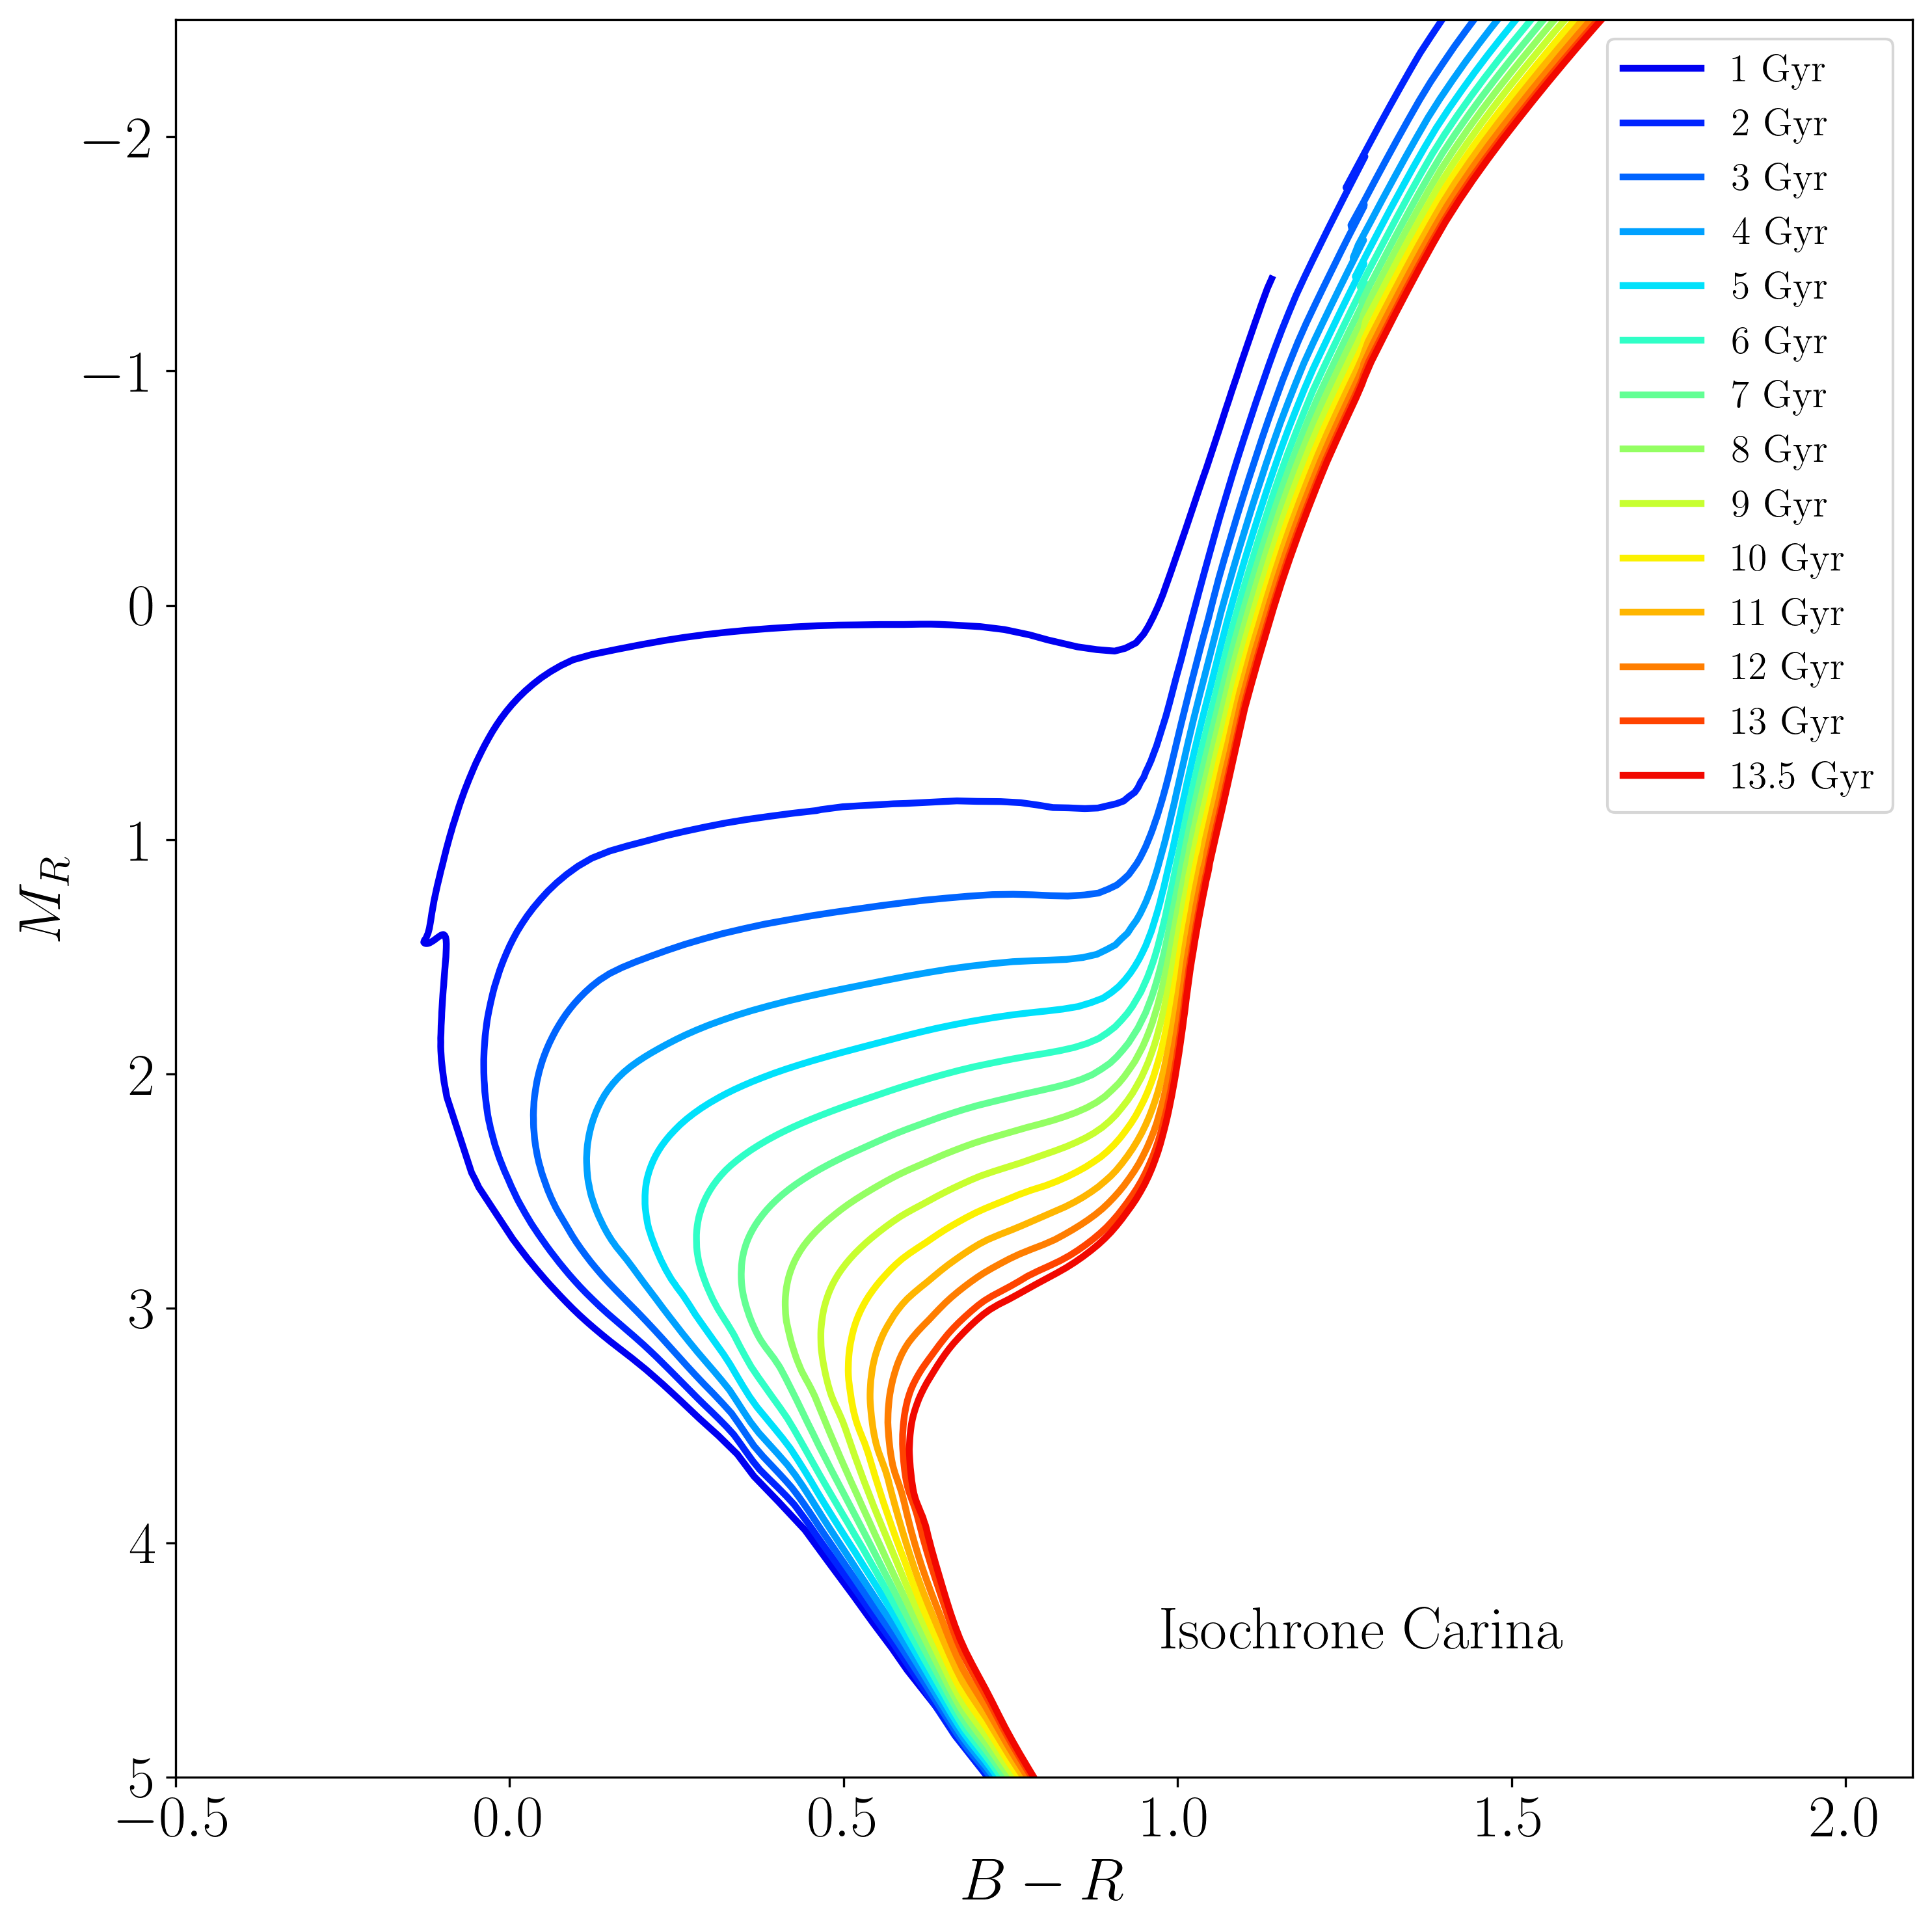

In [83]:
# Plot All Isochrones 
# For Carina

# Setup
fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)

# Plot Isochrones
# Plotting Color vs. Difference in Color

# Loop through all isochrones
for i, file in enumerate(files):
    # READ IN DATA
    # "dtype=None" means line is split using white spaces
    # "skip_header=8"  skipping the first 8 lines 
    # the flag "names=True" creates arrays to store the date
    #       with the column headers given in line 8 
    data = np.genfromtxt(file,dtype=None,names=True,skip_header=8)
    
    # Plot isochrone
    plt.plot(data['B']-data['R'], data['R'], linewidth=2.5, label=times[i])

# Add axis labels
plt.xlabel(r'$B-R$', fontsize=22)
plt.ylabel(r'$M_R$', fontsize=22)

#set axis limits
plt.xlim(-0.5,2.1)
plt.ylim(5,-2.5)

#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

# add a legend with some customizations.
legend = ax.legend(loc='upper right', fontsize='x-large')

#add figure text
plt.figtext(0.6, 0.15, 'Isochrone Carina', fontsize=22)
fig.tight_layout()

# Save the image
plt.savefig('all_isochrones.png')

Pretty rainbow! We get the the colormap give us the gist (pun intended) of younger/bluer stars and older/redder stars, while still not being quite right. It would be cool to color the curves based on the actual $B-V$ values (the actual color), but Matplotlib doesn't have a way to do this, as far as I know, without fudging it a bit with a scatterplot.

## From Inferred Formation Episodes:

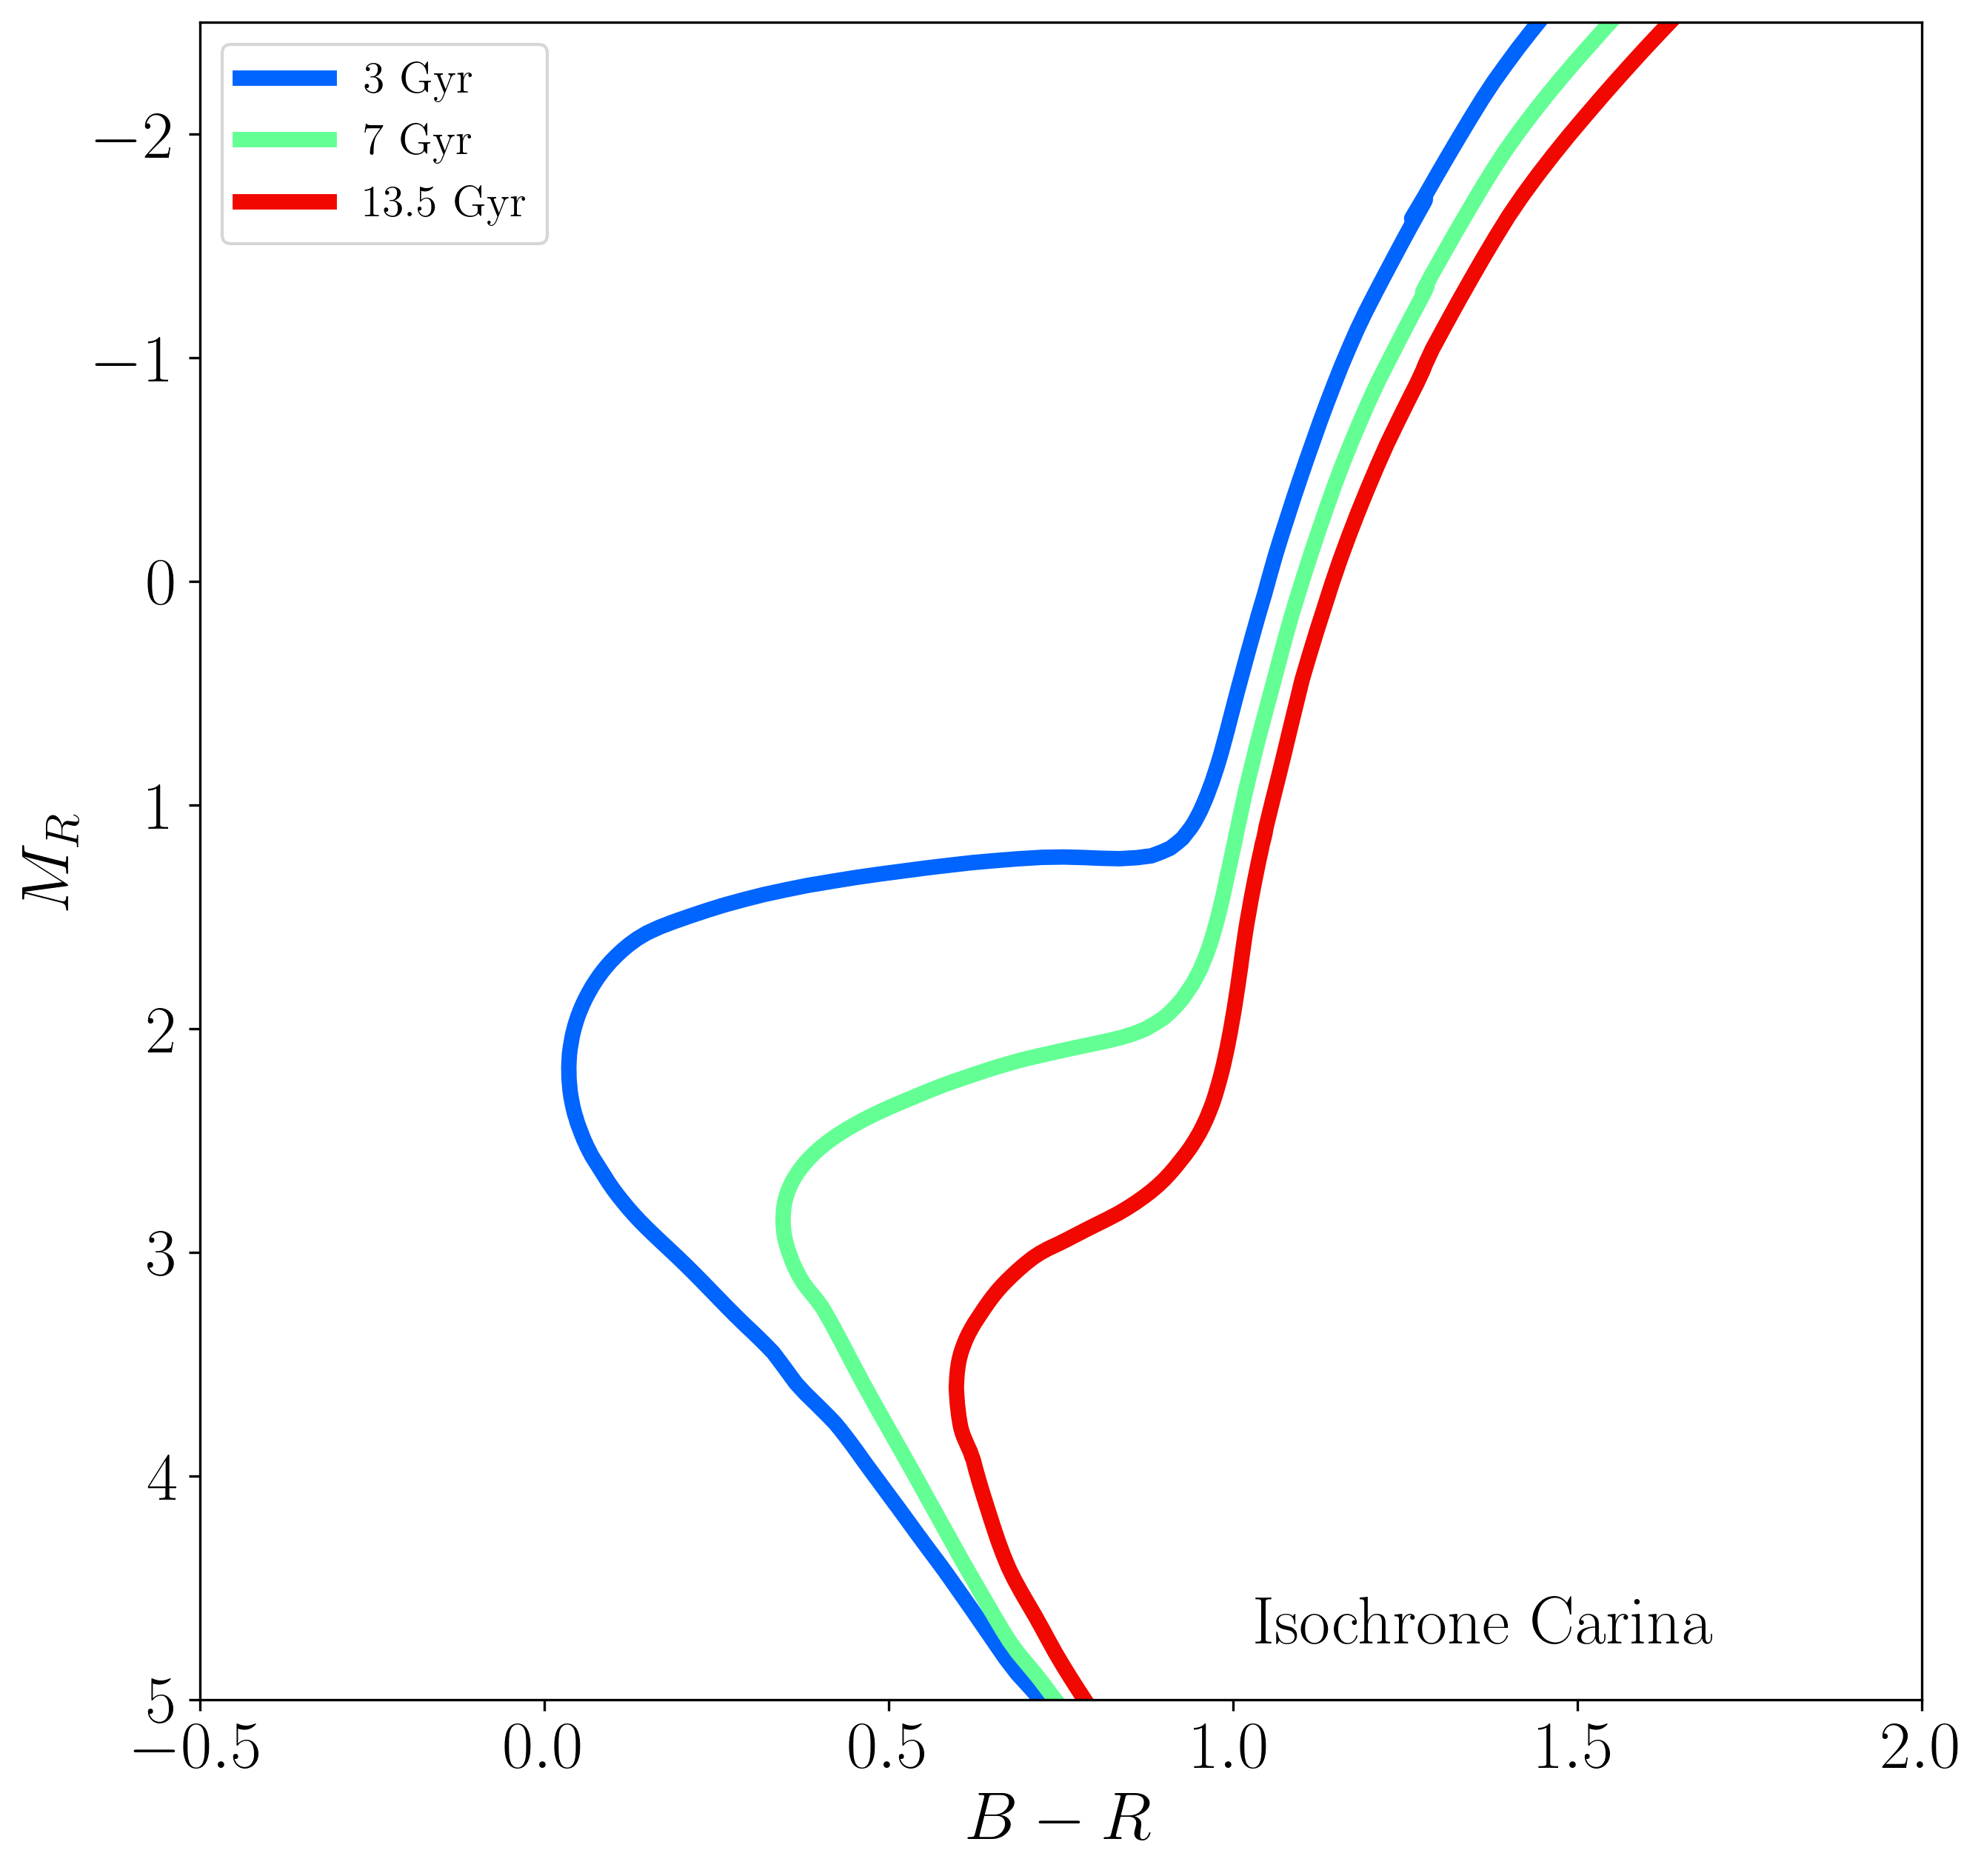

In [84]:
# Plot Inferred Isochrones for Carina

# Setup
fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)

# Plot Isochrones
# Plotting Color vs. Difference in Color

# 3 Gyr
data_3Gyr = np.genfromtxt(files[2], dtype=None,names=True, skip_header=8)
plt.plot(data_3Gyr['B']-data_3Gyr['R'], data_3Gyr['R'], linewidth=5, label=times[2], color='C2')

# 7 Gyr
data_7Gyr = np.genfromtxt(files[6], dtype=None,names=True, skip_header=8)
plt.plot(data_7Gyr['B']-data_7Gyr['R'], data_7Gyr['R'], linewidth=5, label=times[6], color='C6')

# 13.5 Gyr
data_13_5Gyr = np.genfromtxt(files[13], dtype=None,names=True, skip_header=8)
plt.plot(data_13_5Gyr['B']-data_13_5Gyr['R'], data_13_5Gyr['R'], linewidth=5, label=times[13], color='C13')

# Add axis labels
plt.xlabel(r'$B-R$', fontsize=22)
plt.ylabel(r'$M_R$', fontsize=22)

#set axis limits
plt.xlim(-0.5,2.0)
plt.ylim(5,-2.5)

#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

# add a legend with some customizations.
legend = ax.legend(loc='upper left', fontsize='x-large')

#add figure text
plt.figtext(0.6, 0.15, 'Isochrone Carina', fontsize=22)

# Save the image
plt.savefig('IsochroneLab4.png')

The green does look a bit silly here!

# Q2

Could there be younger ages than suggested in the Tolstoy plot?
Try adding younger isochrones to the above plot.

Yeah, it looks like we have some stars extending left to be bluer than $B-R = 0$, so here's a plot with the 1 Gyr isochrone, as well:

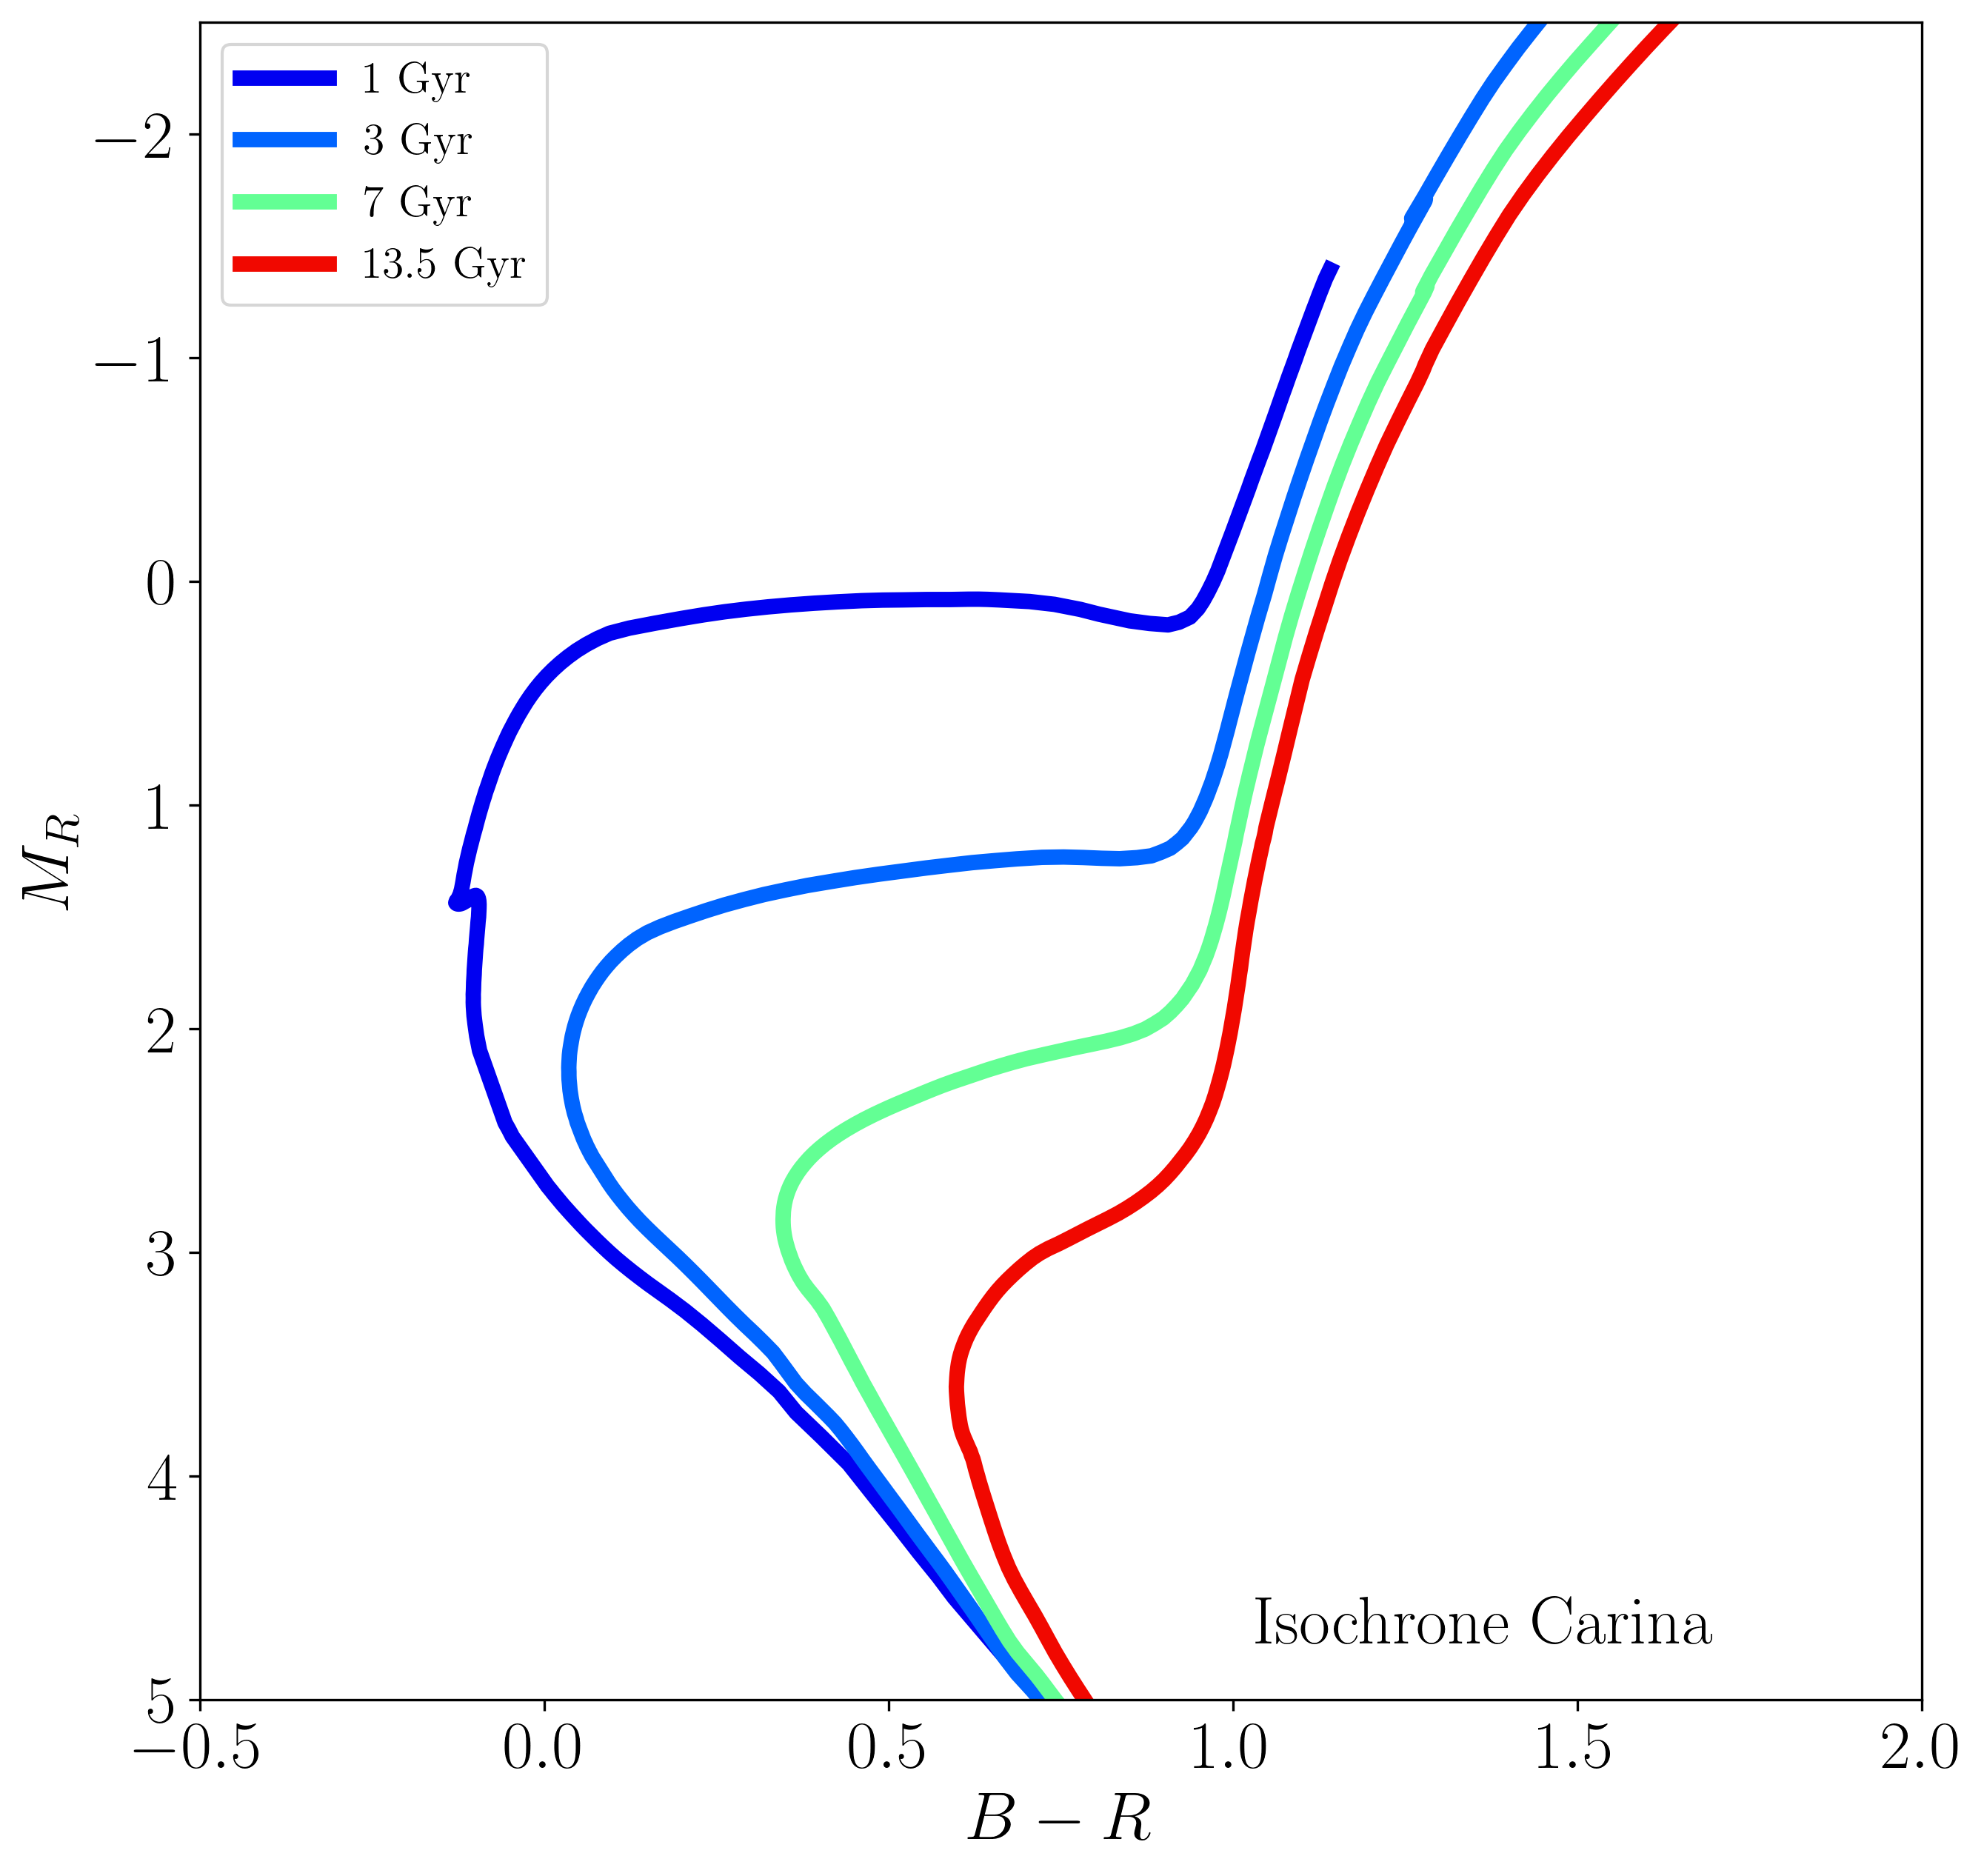

In [85]:
# Plot Inferred Isochrones for Carina

# Setup
fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)

# Plot Isochrones
# Plotting Color vs. Difference in Color

# 1 Gyr
data_1Gyr = np.genfromtxt(files[0], dtype=None,names=True, skip_header=8)
plt.plot(data_1Gyr['B']-data_1Gyr['R'], data_1Gyr['R'], linewidth=5, label=times[0], color='C0')

# # 2 Gyr
# data_2Gyr = np.genfromtxt(files[1], dtype=None,names=True, skip_header=8)
# plt.plot(data_2Gyr['B']-data_2Gyr['R'], data_2Gyr['R'], linewidth=5, label=times[1], color='C1')

# 3 Gyr
data_3Gyr = np.genfromtxt(files[2], dtype=None,names=True, skip_header=8)
plt.plot(data_3Gyr['B']-data_3Gyr['R'], data_3Gyr['R'], linewidth=5, label=times[2], color='C2')

# 7 Gyr
data_7Gyr = np.genfromtxt(files[6], dtype=None,names=True, skip_header=8)
plt.plot(data_7Gyr['B']-data_7Gyr['R'], data_7Gyr['R'], linewidth=5, label=times[6], color='C6')

# 13.5 Gyr
data_13_5Gyr = np.genfromtxt(files[13], dtype=None,names=True, skip_header=8)
plt.plot(data_13_5Gyr['B']-data_13_5Gyr['R'], data_13_5Gyr['R'], linewidth=5, label=times[13], color='C13')

# Add axis labels
plt.xlabel(r'$B-R$', fontsize=22)
plt.ylabel(r'$M_R$', fontsize=22)

#set axis limits
plt.xlim(-0.5,2.0)
plt.ylim(5,-2.5)

#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

# add a legend with some customizations.
legend = ax.legend(loc='upper left', fontsize='x-large')

#add figure text
plt.figtext(0.6, 0.15, 'Isochrone Carina', fontsize=22)

# Save the image
plt.savefig('IsochroneLab4_younger_also.png')

That looks pretty good, I think.

# Q3

What do you think might cause the bursts of star formation?

Good question. It's periodic, and the pace seems to be quickening, with a period of billions of years sounding about right for a frequency of an orbiting galaxy to interact with its host (the Milky Way). The quickening makes sense for damped, periodic motion, i.e. a dwarf galaxy being slowed by *dynamical friction* from the larger galaxy's dark matter halo, having a dark matter wake, etc. while spiraling into the larger galaxy. So I'd figure that close encounters with the MW are causing gas to get smushed together enough to incite star formation. I have to admit that I didn't come up with all that on my own and went off to read de Boer et al. 2014 (https://www.aanda.org/articles/aa/full_html/2014/12/aa24119-14/aa24119-14.html) which shifted my thinking from the cause of star formation bursts being collisions through the disk of the Milky Way $\to$ more general close encounters which tidally disrupt the Carina dwarf spheroidal galaxy. In the paper, they also present a theory of gas infall from Lemasale et al. 2012, but de Boer et al. find that less likely and I'm inclined to believe them (both de Boer and Lemasale are on both papers so really they're just figuring things out better for themselves, these aren't exactly separate groups)â€”but what do I know!